In [49]:
!wget https://raw.githubusercontent.com/YoussefAboelwafa/Clustering-Penguins-Species/refs/heads/main/dataset/penguins.csv

--2025-05-22 04:34:52--  https://raw.githubusercontent.com/YoussefAboelwafa/Clustering-Penguins-Species/refs/heads/main/dataset/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458 (8.3K) [text/plain]
Saving to: ‘penguins.csv.2’

penguins.csv.2      100%[===================>]   8.26K  --.-KB/s    in 0s      

2025-05-22 04:34:52 (36.5 MB/s) - ‘penguins.csv.2’ saved [8458/8458]



In [50]:
import pandas as pd

df = pd.read_csv('penguins.csv')

In [51]:
df = df.dropna()

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(df)

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print( "sil : ", silhouette_score(df, kmeans.labels_))
print( "dav : ", davies_bouldin_score(df, kmeans.labels_))

sil :  0.5154516039138055
dav :  0.474526261178428


In [55]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering().fit(df)

In [56]:
print( "sil : ", silhouette_score(df, agglomerative.labels_))
print( "dav : ", davies_bouldin_score(df, agglomerative.labels_))

sil :  0.6184834811551677
dav :  0.509274768989531


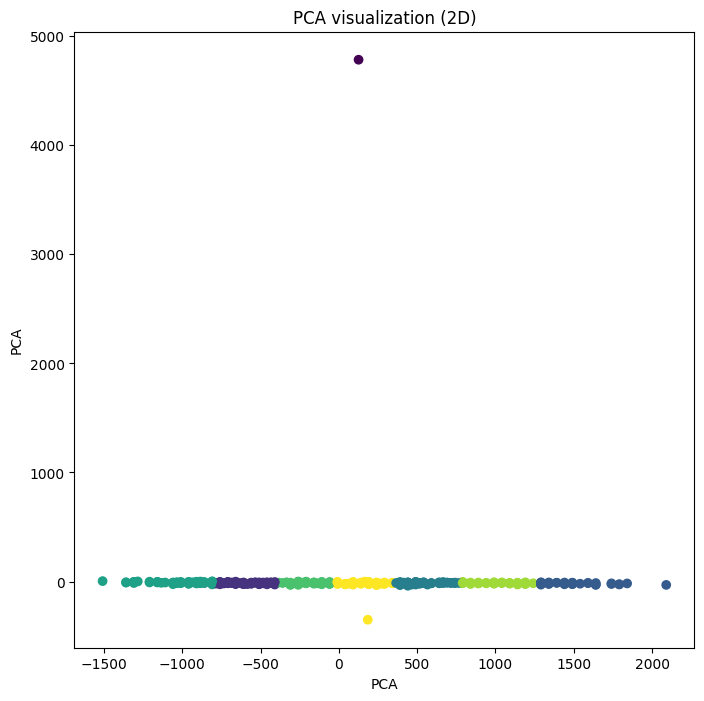

In [65]:
from sklearn.decomposition import PCA

pcas = PCA(n_components=2).fit_transform(df)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(pcas[:, 0], pcas[:, 1], c=kmeans.labels_)
ax.set_title('PCA visualization (2D)')
ax.set_xlabel('PCA')
ax.set_ylabel('PCA')

plt.show()

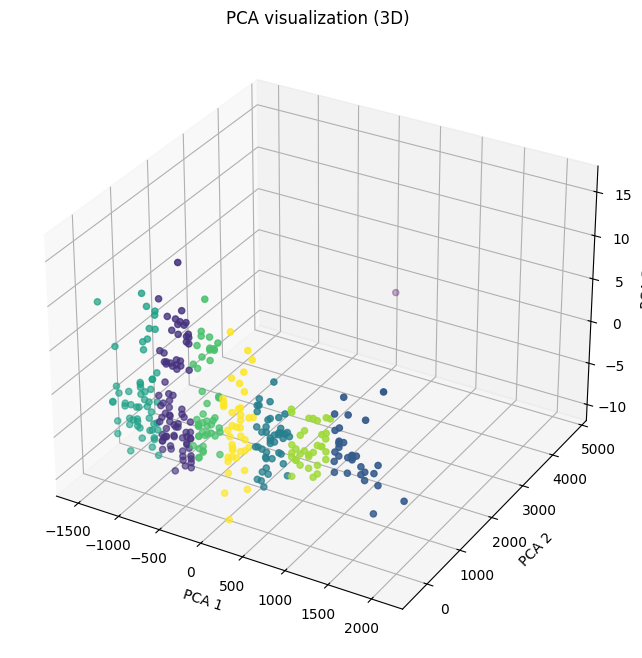

In [68]:
pcas = PCA(n_components=3).fit_transform(df)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(pcas[:, 0], pcas[:, 1], pcas[:, 2], c=kmeans.labels_)
ax.set_title('PCA visualization (3D)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()